# Kaggle Environment

In [1]:
!pip install -q kaggle

In [2]:
cred = {"username":"revypramana","key":"d254daa8e59ce7d11e6aade701531694"}

In [3]:
!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

api_token = cred
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d fatemehmehrparvar/obesity-levels

Dataset URL: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/57.6k [00:00<?, ?B/s]
100% 57.6k/57.6k [00:00<00:00, 2.62MB/s]


In [5]:
!unzip "obesity-levels.zip"

Archive:  obesity-levels.zip
  inflating: ObesityDataSet_raw_and_data_sinthetic.csv  


# Importing Libraries

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
import xgboost as xgb
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization, Input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from scipy.stats import randint


warnings.filterwarnings("ignore")

# Importing Dataset

In [7]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', sep=',')
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [9]:
df.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
df.nunique()

Age                               1402
Gender                               2
Height                            1574
Weight                            1525
CALC                                 4
FAVC                                 2
FCVC                               810
NCP                                635
SCC                                  2
SMOKE                                2
CH2O                              1268
family_history_with_overweight       2
FAF                               1190
TUE                               1129
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [11]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Karena ada beberapa value yang berbentuk float, saya akan melakukan penyesuaian berikut:
- Mengganti tipe data Age menjadi int
- Membulatkan angka-angka yang memiliki koma

In [12]:
df['Age'] = df['Age'].astype(int)

f_column = ['Height', 'Weight','NCP', 'FCVC', 'CH2O', 'FAF', 'TUE']

df[f_column] = df[f_column].round(2)

In [13]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64.00,no,no,2.0,3.0,no,no,2.00,yes,0.00,1.00,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56.00,Sometimes,no,3.0,3.0,yes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.80,77.00,Frequently,no,2.0,3.0,no,no,2.00,yes,2.00,1.00,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.80,87.00,Frequently,no,3.0,3.0,no,no,2.00,no,2.00,0.00,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.80,Sometimes,no,2.0,1.0,no,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,Female,1.71,131.41,Sometimes,yes,3.0,3.0,no,no,1.73,yes,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III
2107,21,Female,1.75,133.74,Sometimes,yes,3.0,3.0,no,no,2.01,yes,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III
2108,22,Female,1.75,133.69,Sometimes,yes,3.0,3.0,no,no,2.05,yes,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III
2109,24,Female,1.74,133.35,Sometimes,yes,3.0,3.0,no,no,2.85,yes,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
df.duplicated().sum()

24

Terdapat 24 data yang muncul lebih dari satu

In [15]:
duplicated_df = df.loc[df.duplicated(keep=False), :]
duplicated_df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
97,21,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
98,21,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
105,25,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
106,25,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
145,21,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I


In [16]:
df = df.drop_duplicates()
df.shape

(2087, 17)

Karena sudah saya drop data-data yang muncul lebih dari satu, maka dimensi dari datasetnya berkurang

In [17]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.009104,1.702616,86.858706,2.421409,2.701203,2.004792,1.012827,0.663057
std,6.333297,0.093251,26.190838,0.534807,0.764655,0.608281,0.853496,0.608183
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.630000,66.000000,2.000000,2.700000,1.590000,0.125000,0.000000
50%,22.000000,1.700000,83.100000,2.400000,3.000000,2.000000,1.000000,0.630000
75%,26.000000,1.770000,108.015000,3.000000,3.000000,2.465000,1.680000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [18]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64.00,no,no,2.0,3.0,no,no,2.00,yes,0.00,1.00,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56.00,Sometimes,no,3.0,3.0,yes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.80,77.00,Frequently,no,2.0,3.0,no,no,2.00,yes,2.00,1.00,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.80,87.00,Frequently,no,3.0,3.0,no,no,2.00,no,2.00,0.00,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.80,Sometimes,no,2.0,1.0,no,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,Female,1.71,131.41,Sometimes,yes,3.0,3.0,no,no,1.73,yes,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III
2107,21,Female,1.75,133.74,Sometimes,yes,3.0,3.0,no,no,2.01,yes,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III
2108,22,Female,1.75,133.69,Sometimes,yes,3.0,3.0,no,no,2.05,yes,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III
2109,24,Female,1.74,133.35,Sometimes,yes,3.0,3.0,no,no,2.85,yes,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III


In [19]:
df.reset_index(inplace=True)
df

,index,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0,21,Female,1.62,64.00,no,no,2.0,3.0,no,no,2.00,yes,0.00,1.00,Sometimes,Public_Transportation,Normal_Weight
1,1,21,Female,1.52,56.00,Sometimes,no,3.0,3.0,yes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,2,23,Male,1.80,77.00,Frequently,no,2.0,3.0,no,no,2.00,yes,2.00,1.00,Sometimes,Public_Transportation,Normal_Weight
3,3,27,Male,1.80,87.00,Frequently,no,3.0,3.0,no,no,2.00,no,2.00,0.00,Sometimes,Walking,Overweight_Level_I
4,4,22,Male,1.78,89.80,Sometimes,no,2.0,1.0,no,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,2106,20,Female,1.71,131.41,Sometimes,yes,3.0,3.0,no,no,1.73,yes,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III
2083,2107,21,Female,1.75,133.74,Sometimes,yes,3.0,3.0,no,no,2.01,yes,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III
2084,2108,22,Female,1.75,133.69,Sometimes,yes,3.0,3.0,no,no,2.05,yes,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III
2085,2109,24,Female,1.74,133.35,Sometimes,yes,3.0,3.0,no,no,2.85,yes,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III


### Untuk membantu prediksi, saya akan menambahkan fitur BMI

In [20]:
# Calculate the Body Mass Index (BMI)
df['BMI'] = round(df['Weight'] / (df['Height']) ** 2, 2)

df

,index,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,BMI
0,0,21,Female,1.62,64.00,no,no,2.0,3.0,no,no,2.00,yes,0.00,1.00,Sometimes,Public_Transportation,Normal_Weight,24.39
1,1,21,Female,1.52,56.00,Sometimes,no,3.0,3.0,yes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight,24.24
2,2,23,Male,1.80,77.00,Frequently,no,2.0,3.0,no,no,2.00,yes,2.00,1.00,Sometimes,Public_Transportation,Normal_Weight,23.77
3,3,27,Male,1.80,87.00,Frequently,no,3.0,3.0,no,no,2.00,no,2.00,0.00,Sometimes,Walking,Overweight_Level_I,26.85
4,4,22,Male,1.78,89.80,Sometimes,no,2.0,1.0,no,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II,28.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,2106,20,Female,1.71,131.41,Sometimes,yes,3.0,3.0,no,no,1.73,yes,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III,44.94
2083,2107,21,Female,1.75,133.74,Sometimes,yes,3.0,3.0,no,no,2.01,yes,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III,43.67
2084,2108,22,Female,1.75,133.69,Sometimes,yes,3.0,3.0,no,no,2.05,yes,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III,43.65
2085,2109,24,Female,1.74,133.35,Sometimes,yes,3.0,3.0,no,no,2.85,yes,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III,44.04


# EDA

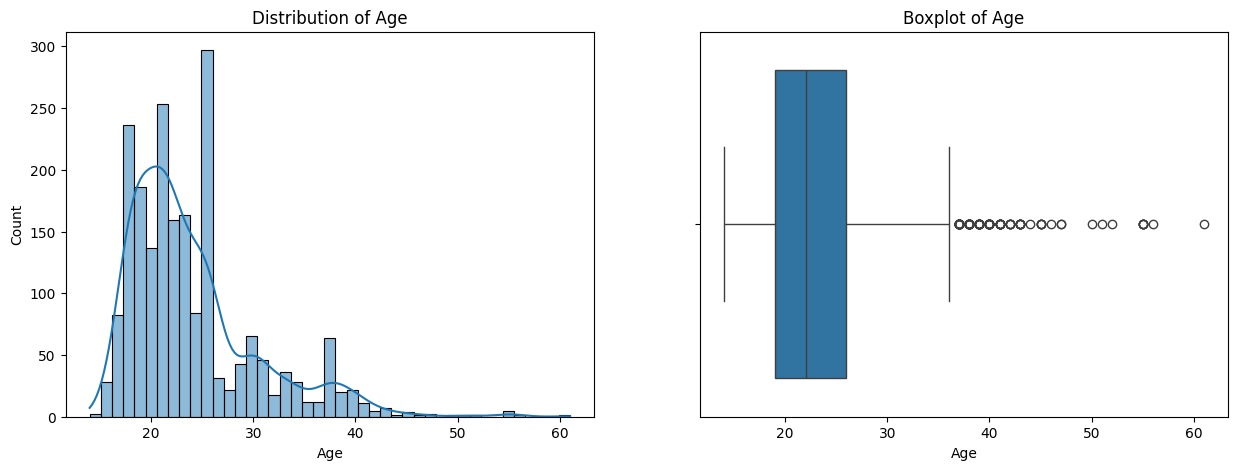

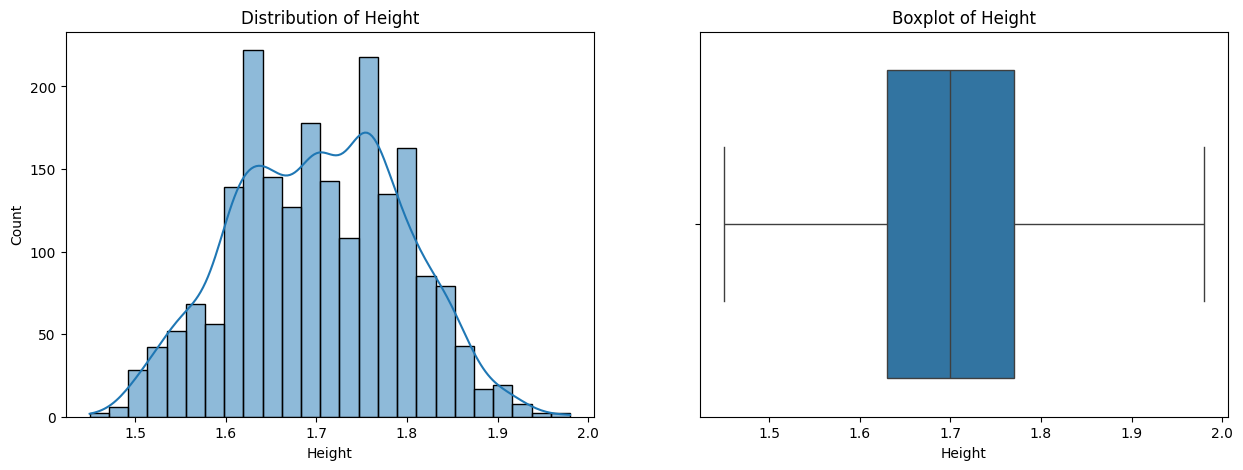

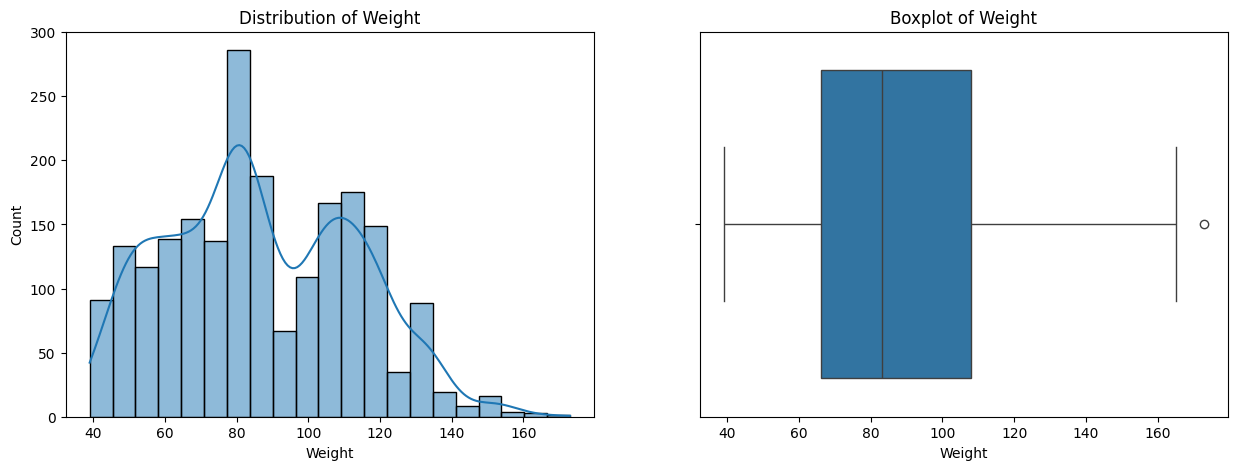

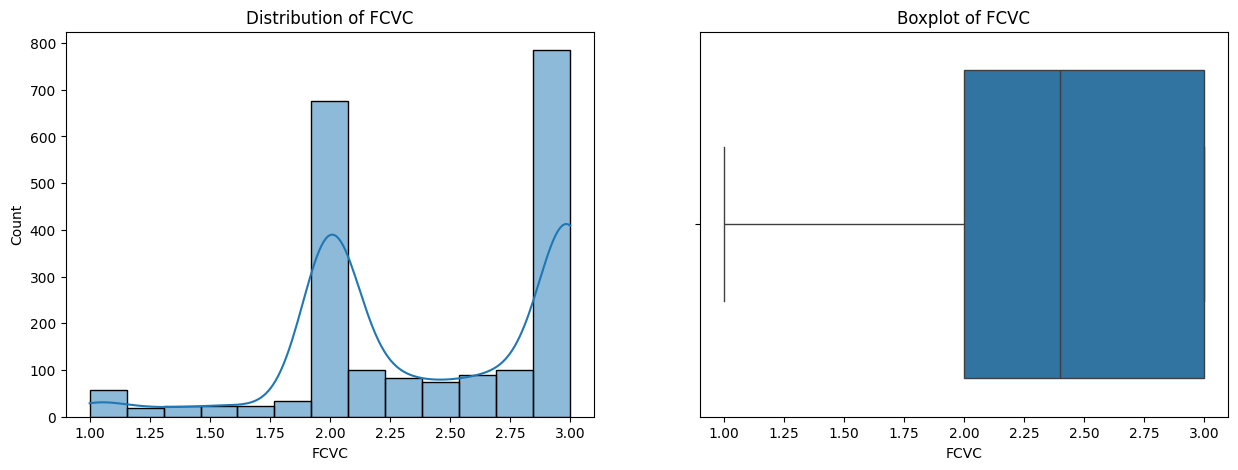

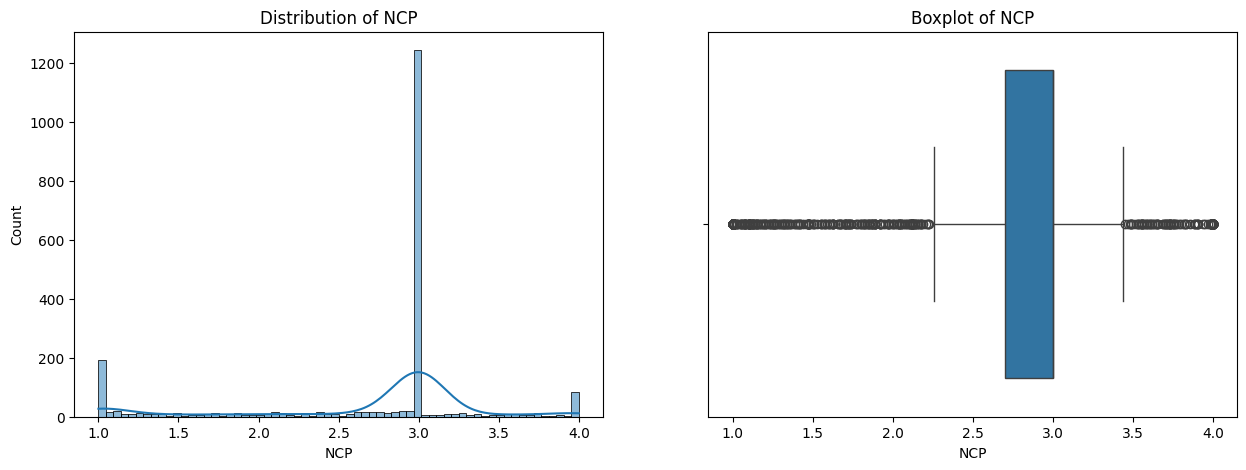

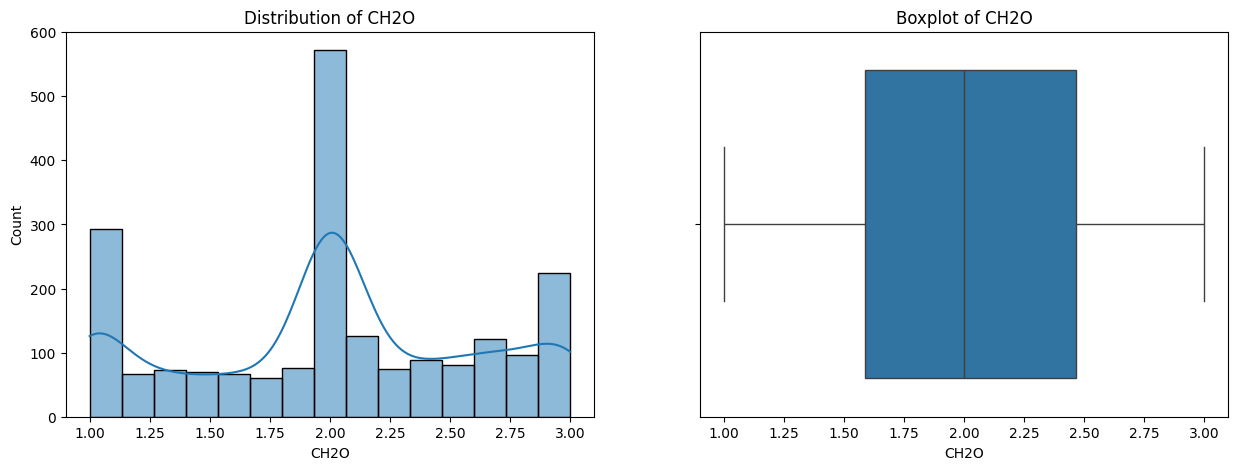

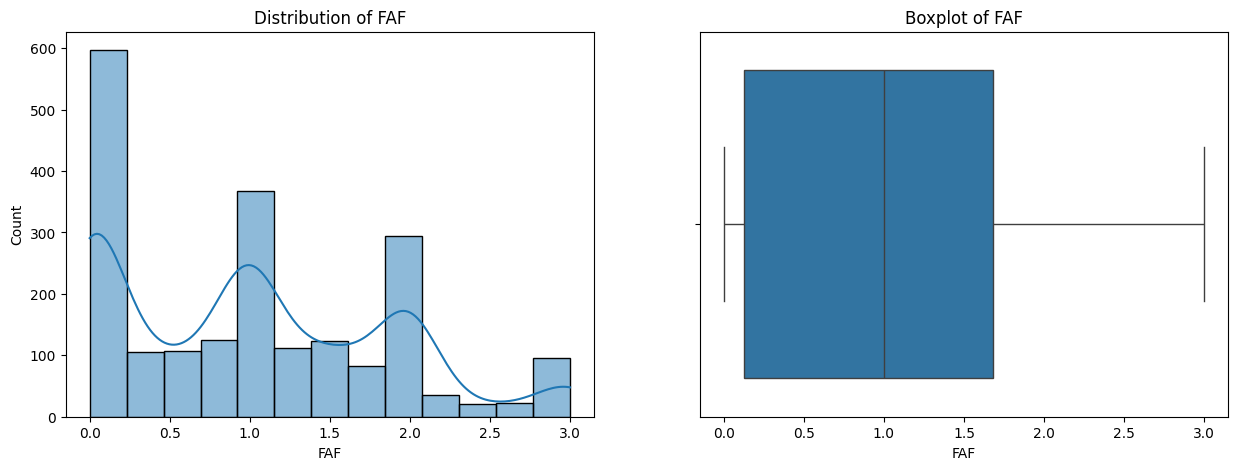

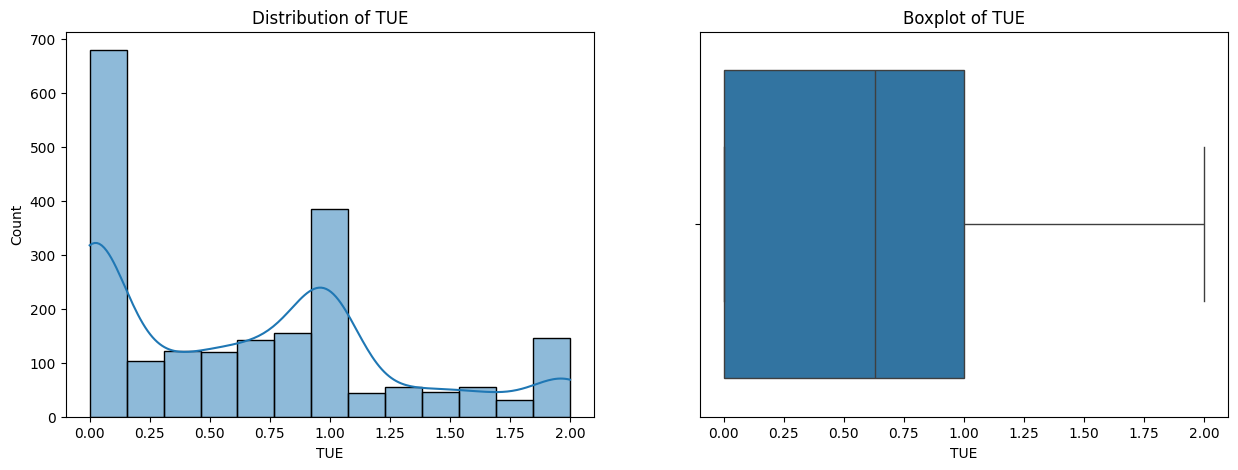

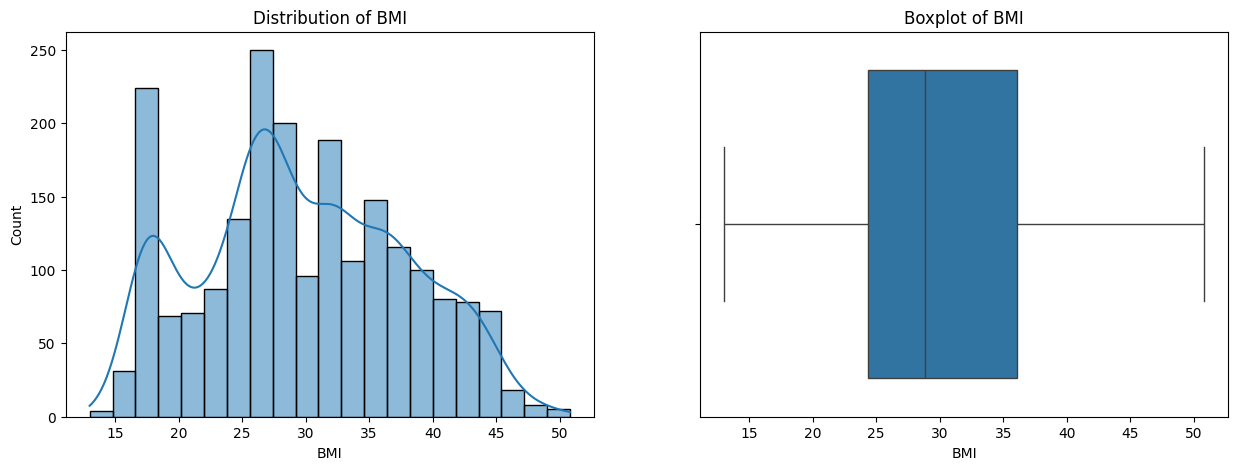

In [21]:
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

for i, column in enumerate(numerical_columns, 1):
    plt.figure(figsize=(15, 5))

    # Create histogram on the left side
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')

    # Create boxplot on the right side
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

    plt.show()


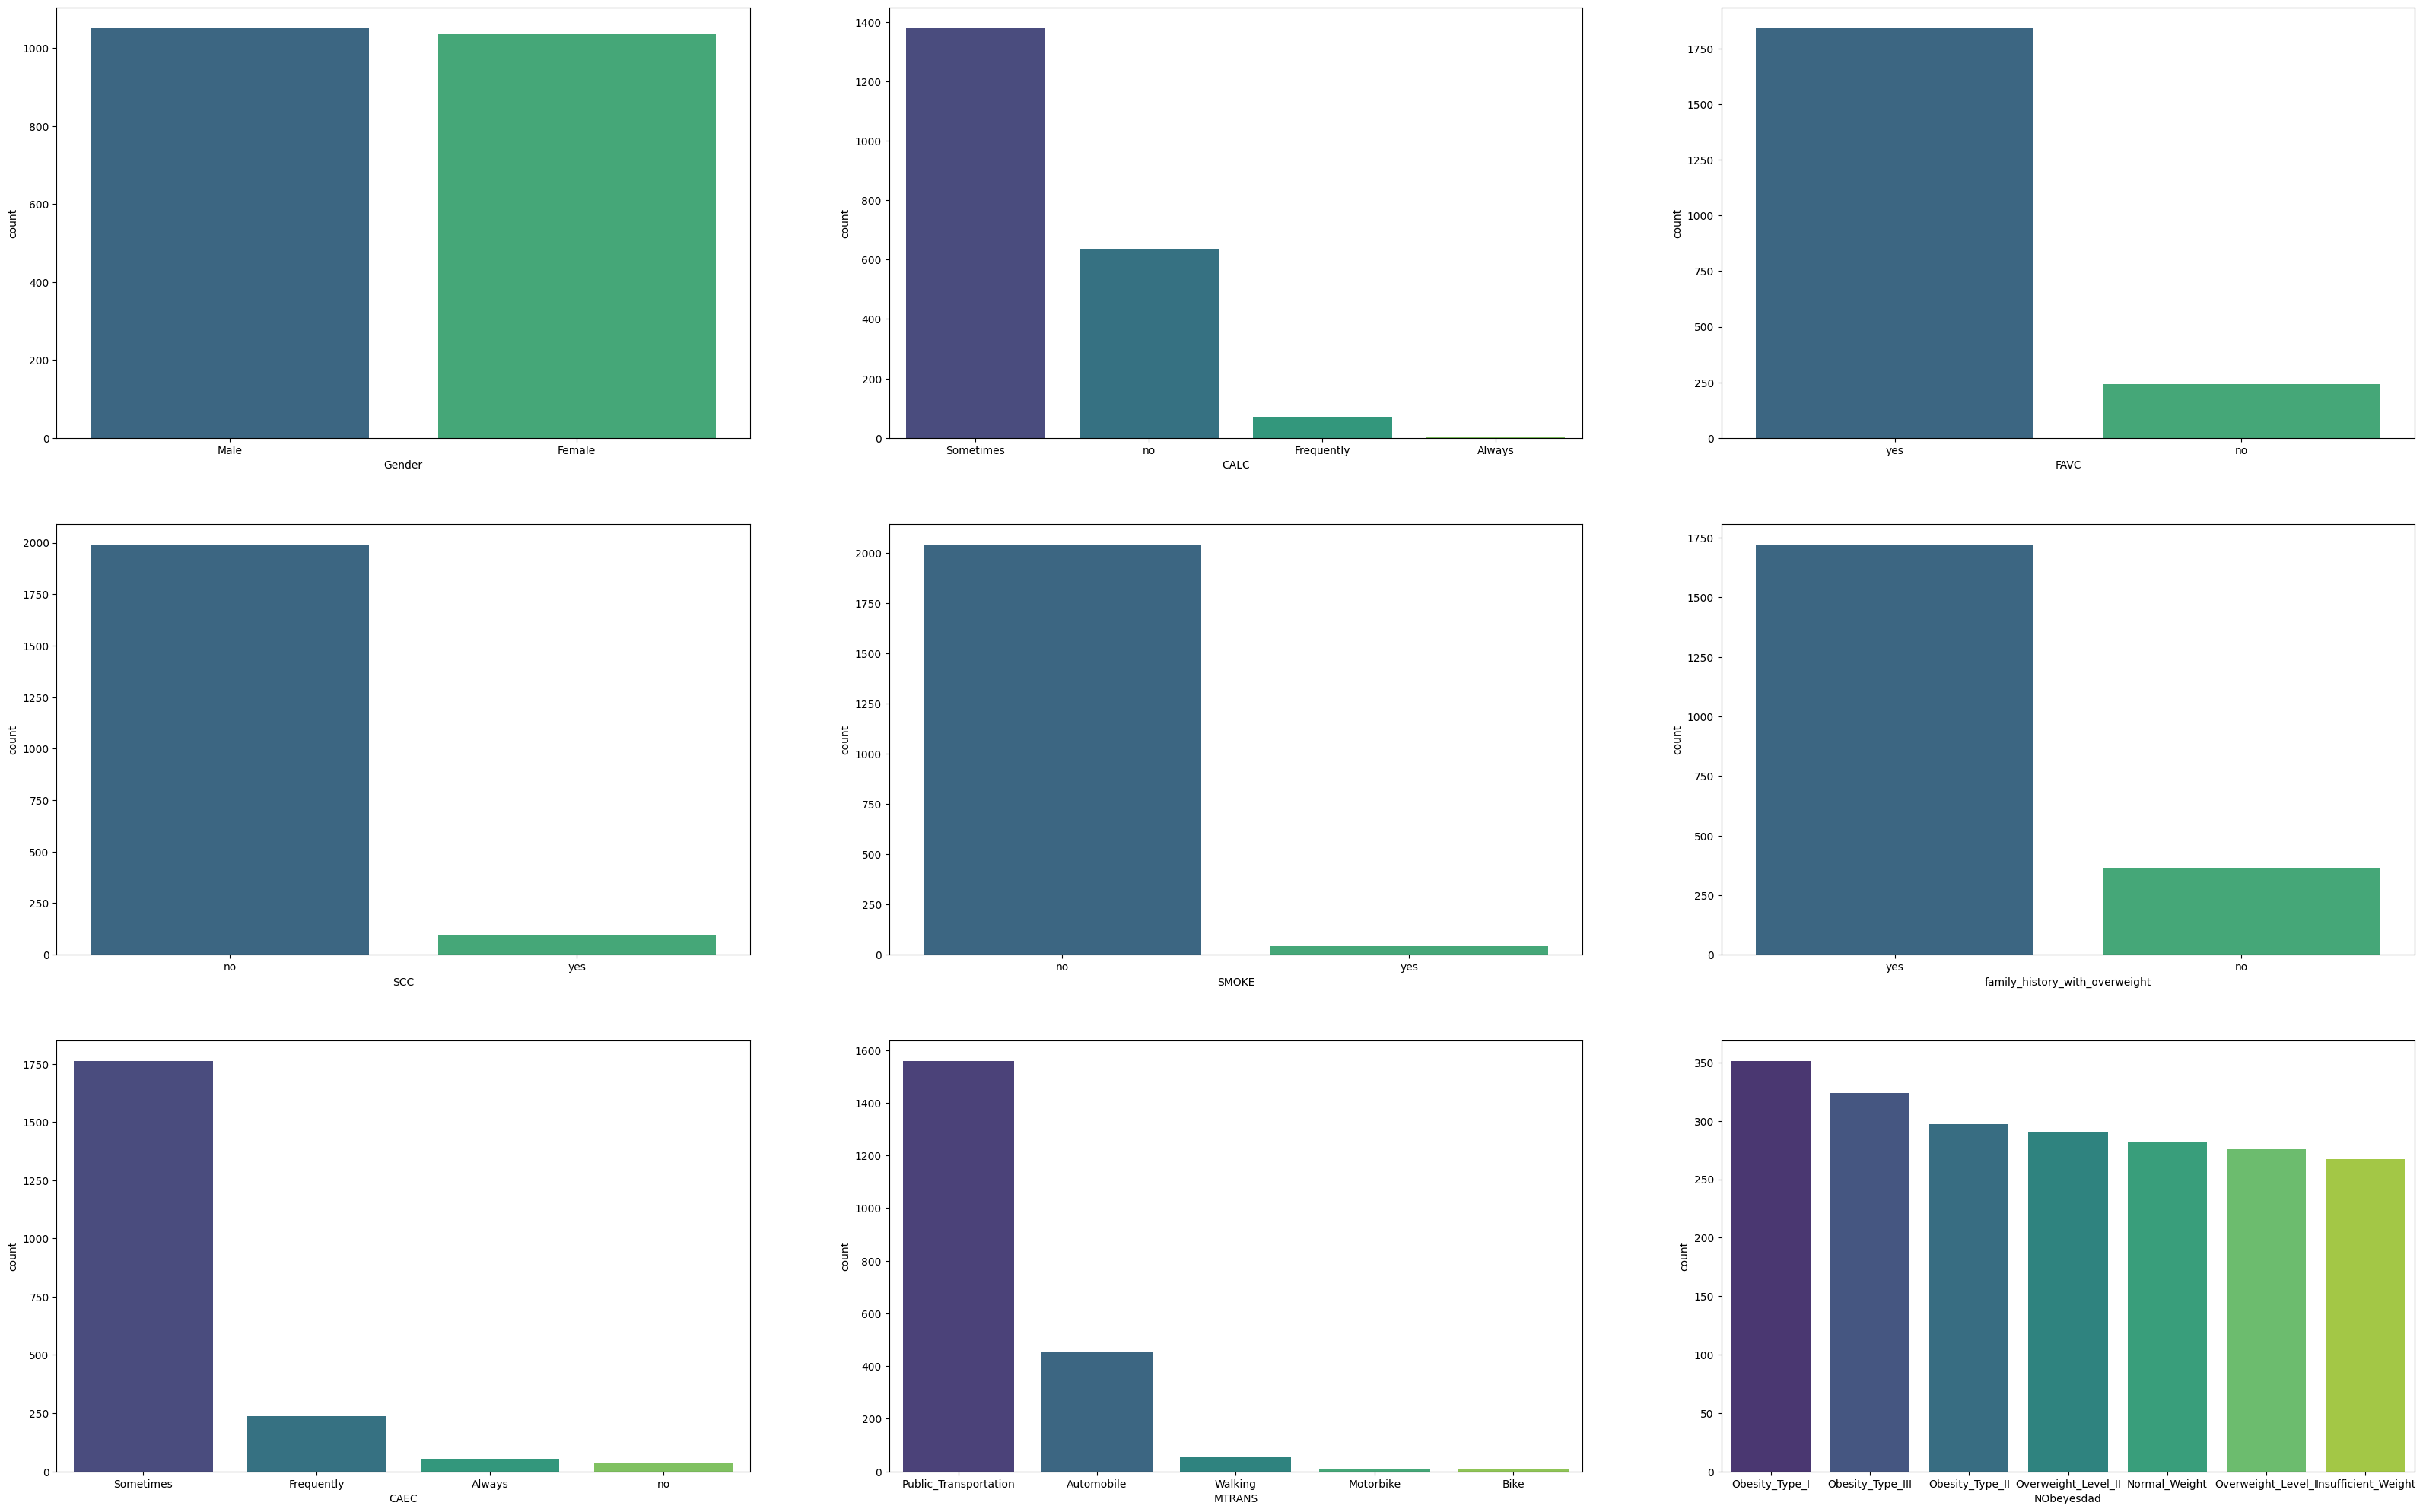

In [22]:
category_cols = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']


plt.figure(figsize=[40, 25])
i = 0
for col in category_cols:
    i+=1
    plt.subplot(3, 3, i)

    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')

plt.show()

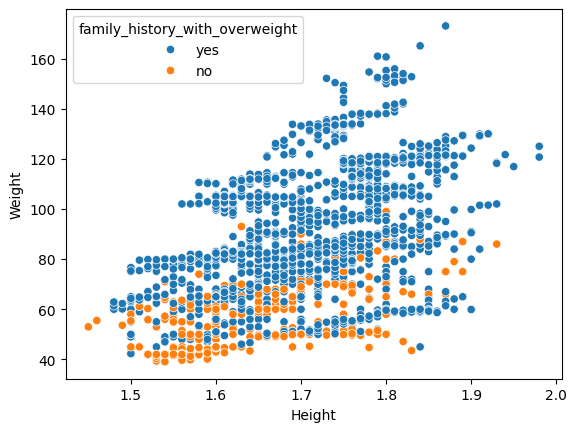

In [23]:
sns.scatterplot(data=df, x='Height', y='Weight', hue='family_history_with_overweight')
plt.show()

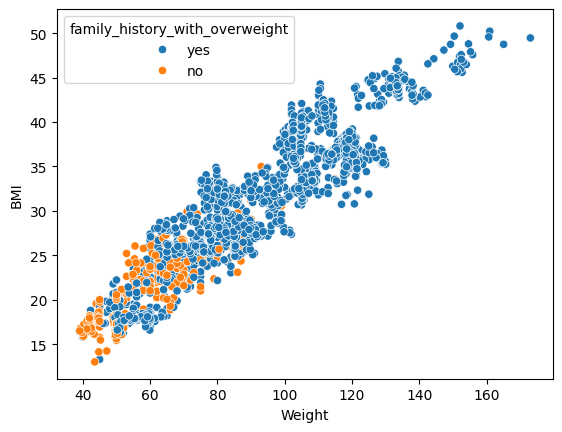

In [24]:
sns.scatterplot(data=df, x='Weight', y='BMI', hue='family_history_with_overweight')
plt.show()

# Data Preprocessing

In [28]:
# Selecting categorical features
categorical_features = df.select_dtypes(exclude="number").columns
categorical_features

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [29]:
one_hot_cols = categorical_features[:-1]

df_categorical = df[one_hot_cols]

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_categorical)

one_hot_feature_names = encoder.get_feature_names_out(one_hot_cols)

df_encoded = pd.DataFrame(encoded_data.toarray(), columns=one_hot_feature_names)

df_final = pd.concat([df, df_encoded], axis=1)

df_final.drop(columns=one_hot_cols, inplace=True)
df_final.drop('index', axis=1, inplace=True)

df_final.head(5)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,BMI,...,family_history_with_overweight_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,24.39,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,24.24,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,23.77,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,26.85,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,28.34,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Hyperparameter Tuning

In [30]:
# Features
X = df_final.drop('NObeyesdad', axis=1)

# Target variable
y = df_final['NObeyesdad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## K Nearest Neighbors

In [31]:
knn = KNeighborsClassifier()

k_range = list(range(1, 31))

param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(X, y)

print(grid.cv_results_)

print(grid.best_score_)
print(grid.best_params_)

{'mean_fit_time': array([0.01090901, 0.00512657, 0.00510488, 0.0052496 , 0.00510049,
       0.00504966, 0.00500069, 0.00540233, 0.00511456, 0.00515289,
       0.00512028, 0.00511968, 0.00526357, 0.00505722, 0.00549421,
       0.00506754, 0.00528061, 0.00493569, 0.00567603, 0.00502162,
       0.00572715, 0.00504761, 0.00497479, 0.00502508, 0.00525911,
       0.0052799 , 0.00489774, 0.00487158, 0.00526924, 0.00522645]), 'std_fit_time': array([1.31058053e-02, 1.64885925e-04, 1.85557527e-04, 4.62869433e-04,
       4.47409295e-04, 1.41829952e-04, 3.54040162e-04, 1.03416232e-03,
       3.82529976e-04, 5.09126347e-04, 5.87681911e-04, 5.64069339e-04,
       5.57731110e-04, 1.38368508e-04, 9.95737664e-04, 9.03477949e-05,
       8.47033866e-04, 1.02702787e-04, 8.85884622e-04, 1.57901434e-04,
       1.25966294e-03, 2.30396317e-04, 1.43678157e-04, 2.74230311e-04,
       2.89120176e-04, 9.27664413e-04, 7.97807990e-05, 5.67808200e-05,
       6.23719716e-04, 3.20957636e-04]), 'mean_score_time': array

Berdasarkan GridSearch di atas, nilai n terbaik untuk KNN adalah 1 neighbors tetapi sebagai komparasi saya juga akan membuat model KNN dengan 3 neighbors.

In [32]:
model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X, y)

print(grid_search.cv_results_)

print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'mean_fit_time': array([0.61985699, 0.95605914, 0.40938846, 0.04773895, 0.2783254 ,
       0.4696757 , 0.22505109, 0.04072309, 0.13697139, 0.24299916,
       0.21727149, 0.04186432, 0.12316004, 0.04884617, 0.37315925,
       0.03980009, 0.18554838, 0.1236337 , 0.36995975, 0.03894051,
       0.39495476, 0.48261992, 0.20908252, 0.05863722, 0.23544256,
       0.47524365, 0.29364443, 0.07601563, 0.14142291, 0.86851112,
       0.37261542, 0.11166581, 0.13748145, 0.12860505, 0.64176687,
       0.06860987, 0.10745184, 0.08010721, 0.32493297, 0.05574059,
       0.40768091, 0.47442547, 0.20907124, 0.18829608, 0.24005453,
       0.46769341, 0.21605587, 0.19171969, 0.06472246, 0.5664111 ,
       0.20951001, 0.18887162, 0.04446514, 0.12767458, 0.37529691,
       0.19574324, 0.06583699, 0.05470896, 0.31515074, 0.31827974,
       0.74268039, 0.92463398, 0.43721533, 0.96578399, 0.24689809,
       0.45503139, 0.22425516, 0.6110963 , 0.058

Berdasarkan GridSearch di atas, parameter terbaik untuk SVM, yaitu:
- C = 100
- gamma = 0.01
- kernel = rbf

# K Nearest Neighbor

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
y_pred = knn.predict(X_test)

                     precision    recall  f1-score   support

Insufficient_Weight     0.9365    1.0000    0.9672        59
      Normal_Weight     1.0000    0.8361    0.9107        61
     Obesity_Type_I     1.0000    1.0000    1.0000        70
    Obesity_Type_II     1.0000    1.0000    1.0000        64
   Obesity_Type_III     1.0000    1.0000    1.0000        60
 Overweight_Level_I     0.8966    0.9455    0.9204        55
Overweight_Level_II     0.9423    1.0000    0.9703        49

           accuracy                         0.9689       418
          macro avg     0.9679    0.9688    0.9669       418
       weighted avg     0.9707    0.9689    0.9684       418



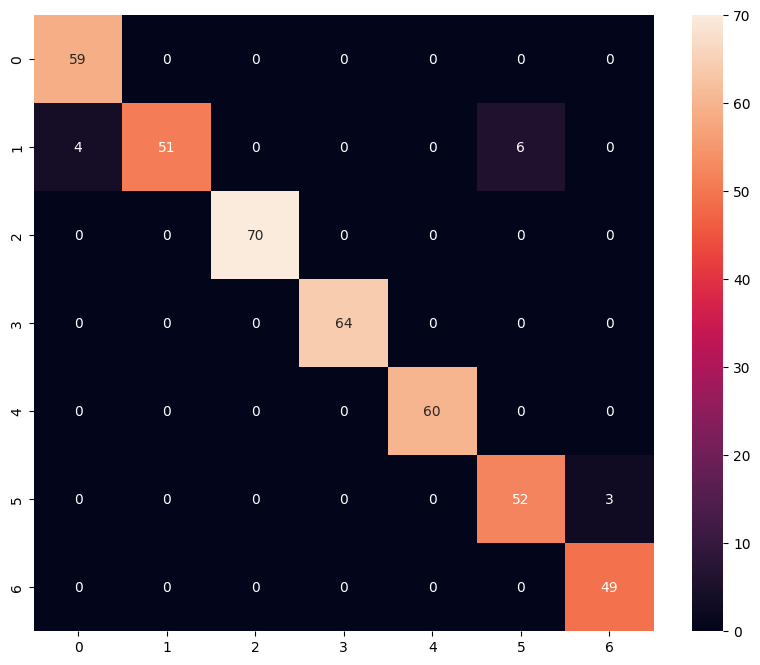

In [35]:
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

                     precision    recall  f1-score   support

Insufficient_Weight     0.8806    1.0000    0.9365        59
      Normal_Weight     1.0000    0.7869    0.8807        61
     Obesity_Type_I     1.0000    1.0000    1.0000        70
    Obesity_Type_II     1.0000    0.9844    0.9921        64
   Obesity_Type_III     0.9836    1.0000    0.9917        60
 Overweight_Level_I     0.9123    0.9455    0.9286        55
Overweight_Level_II     0.9423    1.0000    0.9703        49

           accuracy                         0.9593       418
          macro avg     0.9598    0.9595    0.9571       418
       weighted avg     0.9625    0.9593    0.9584       418



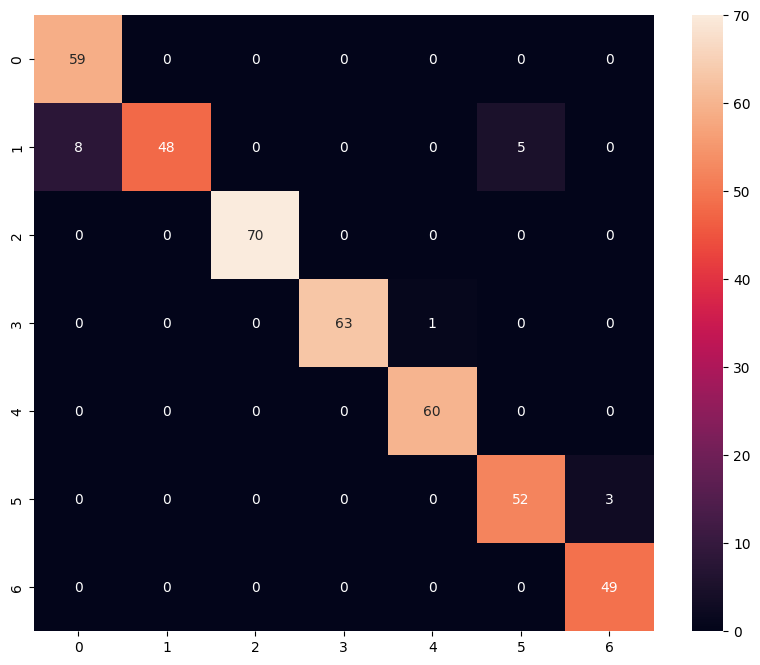

In [37]:
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

# Decision Tree

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

                     precision    recall  f1-score   support

Insufficient_Weight     1.0000    0.9661    0.9828        59
      Normal_Weight     0.9492    0.9180    0.9333        61
     Obesity_Type_I     0.9855    0.9714    0.9784        70
    Obesity_Type_II     0.9692    0.9844    0.9767        64
   Obesity_Type_III     1.0000    1.0000    1.0000        60
 Overweight_Level_I     0.8929    0.9091    0.9009        55
Overweight_Level_II     0.9231    0.9796    0.9505        49

           accuracy                         0.9617       418
          macro avg     0.9600    0.9612    0.9604       418
       weighted avg     0.9623    0.9617    0.9618       418



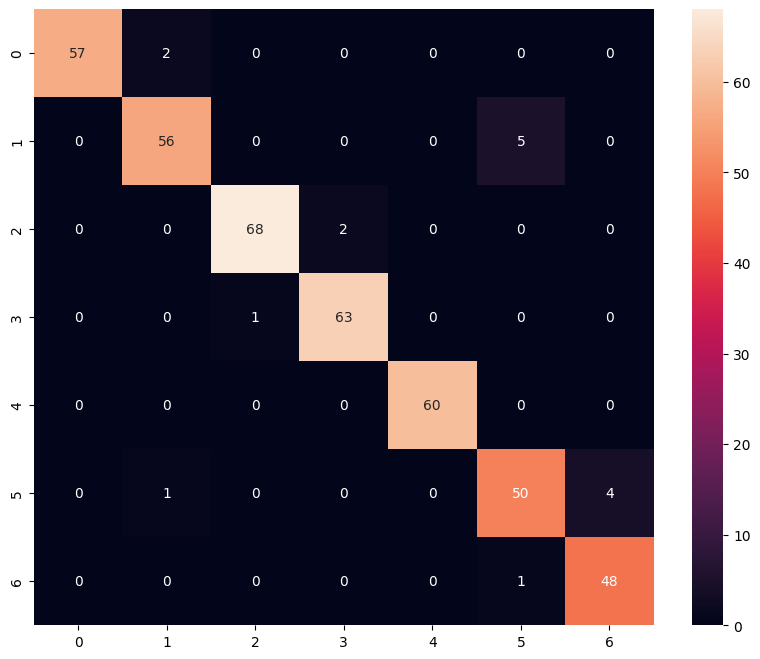

In [39]:
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

# Naive Bayes

                     precision    recall  f1-score   support

Insufficient_Weight     0.6207    0.9153    0.7397        59
      Normal_Weight     0.5926    0.2623    0.3636        61
     Obesity_Type_I     0.7885    0.5857    0.6721        70
    Obesity_Type_II     0.7209    0.9688    0.8267        64
   Obesity_Type_III     1.0000    1.0000    1.0000        60
 Overweight_Level_I     0.7174    0.6000    0.6535        55
Overweight_Level_II     0.6000    0.7347    0.6606        49

           accuracy                         0.7225       418
          macro avg     0.7200    0.7238    0.7023       418
       weighted avg     0.7248    0.7225    0.7036       418



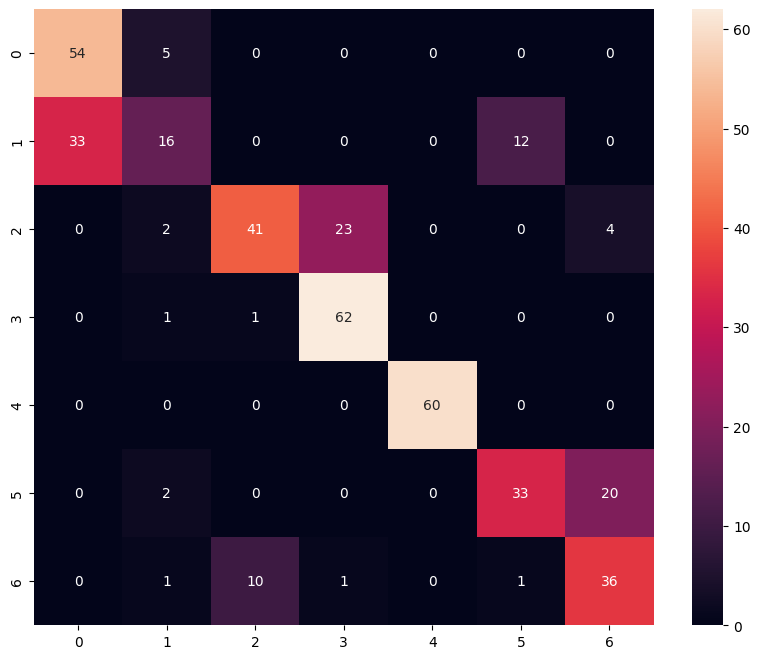

In [40]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

# SVM (Support Vector Machine)

                     precision    recall  f1-score   support

Insufficient_Weight     0.9661    0.9661    0.9661        59
      Normal_Weight     0.9365    0.9672    0.9516        61
     Obesity_Type_I     0.9859    1.0000    0.9929        70
    Obesity_Type_II     1.0000    1.0000    1.0000        64
   Obesity_Type_III     1.0000    1.0000    1.0000        60
 Overweight_Level_I     1.0000    0.9455    0.9720        55
Overweight_Level_II     0.9796    0.9796    0.9796        49

           accuracy                         0.9809       418
          macro avg     0.9812    0.9798    0.9803       418
       weighted avg     0.9812    0.9809    0.9809       418



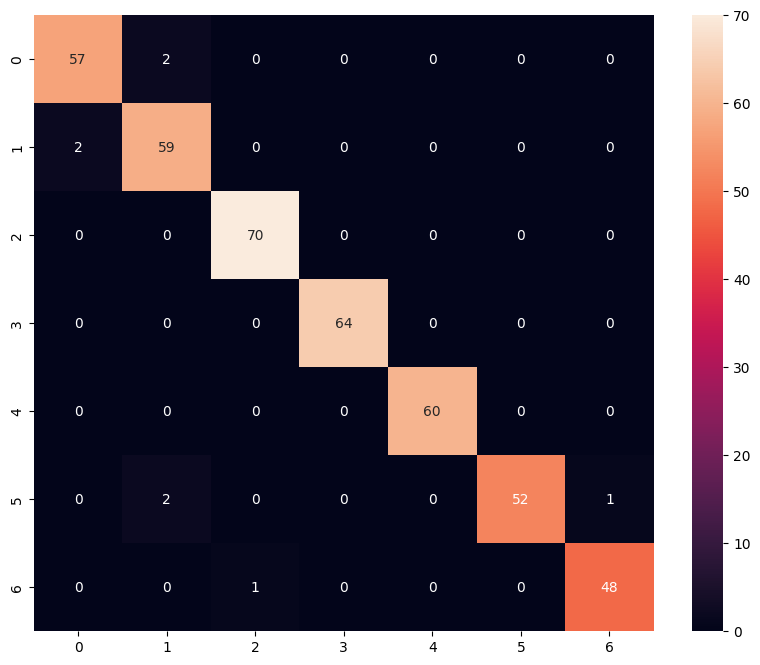

In [41]:
model = SVC(C=100, gamma=0.01, kernel='rbf')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

# Random Forest

                     precision    recall  f1-score   support

Insufficient_Weight     0.9828    0.9661    0.9744        59
      Normal_Weight     0.9365    0.9672    0.9516        61
     Obesity_Type_I     1.0000    1.0000    1.0000        70
    Obesity_Type_II     1.0000    1.0000    1.0000        64
   Obesity_Type_III     1.0000    1.0000    1.0000        60
 Overweight_Level_I     0.9811    0.9455    0.9630        55
Overweight_Level_II     0.9800    1.0000    0.9899        49

           accuracy                         0.9833       418
          macro avg     0.9829    0.9827    0.9827       418
       weighted avg     0.9835    0.9833    0.9833       418



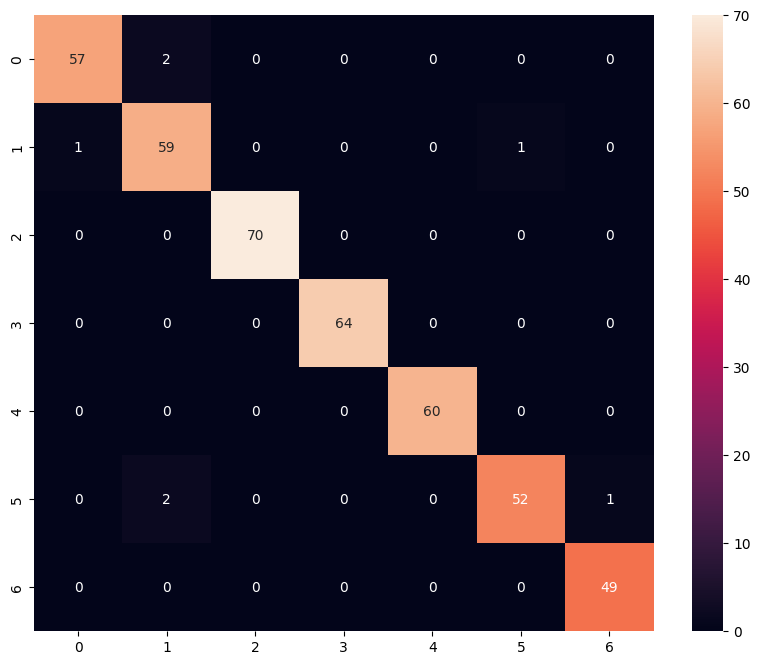

In [42]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

# Gradient Boosting

                     precision    recall  f1-score   support

Insufficient_Weight     1.0000    0.9661    0.9828        59
      Normal_Weight     0.9531    1.0000    0.9760        61
     Obesity_Type_I     1.0000    0.9714    0.9855        70
    Obesity_Type_II     0.9697    1.0000    0.9846        64
   Obesity_Type_III     1.0000    1.0000    1.0000        60
 Overweight_Level_I     0.9800    0.8909    0.9333        55
Overweight_Level_II     0.9057    0.9796    0.9412        49

           accuracy                         0.9737       418
          macro avg     0.9726    0.9726    0.9719       418
       weighted avg     0.9748    0.9737    0.9736       418



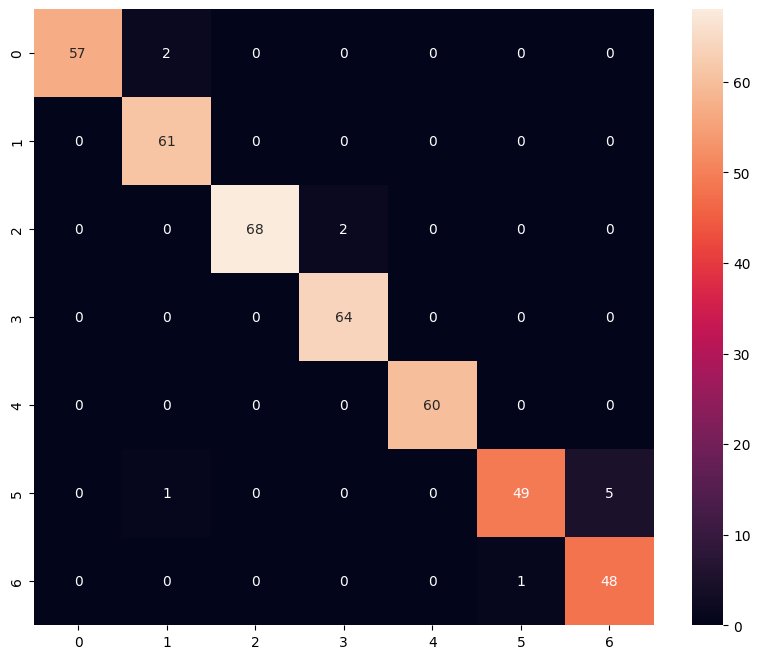

In [43]:
gb_clf = GradientBoostingClassifier()

gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

# Summary

Berdasarkan Model-model machine learning yang sudah digunakan, berikut adalah akurasi yang didapatkan dari masing-masing model:

- K Nearest Neighbors -> 96.89% (untuk n = 1)
- Decision Tree -> 96.17%
- Naive Bayes -> 72.25%
- Support Vector Machine -> 98.09%
- Random Forest -> 98.56%
- Gradient Boosting -> 97.37%

# ANN Model (Sklearn)

In [44]:
ann_clf = MLPClassifier(hidden_layer_sizes=(64, 64, 64, 16, 16), activation='relu', solver='adam',
                        max_iter=200, random_state=42, early_stopping=True)

ann_clf.fit(X_train, y_train)

y_ann = ann_clf.predict(X_test)

                     precision    recall  f1-score   support

Insufficient_Weight     0.9661    0.9661    0.9661        59
      Normal_Weight     0.9180    0.9655    0.9412        58
     Obesity_Type_I     0.9857    0.9452    0.9650        73
    Obesity_Type_II     1.0000    0.9846    0.9922        65
   Obesity_Type_III     1.0000    1.0000    1.0000        60
 Overweight_Level_I     0.9091    0.9259    0.9174        54
Overweight_Level_II     0.8980    0.8980    0.8980        49

           accuracy                         0.9569       418
          macro avg     0.9538    0.9550    0.9543       418
       weighted avg     0.9576    0.9569    0.9571       418



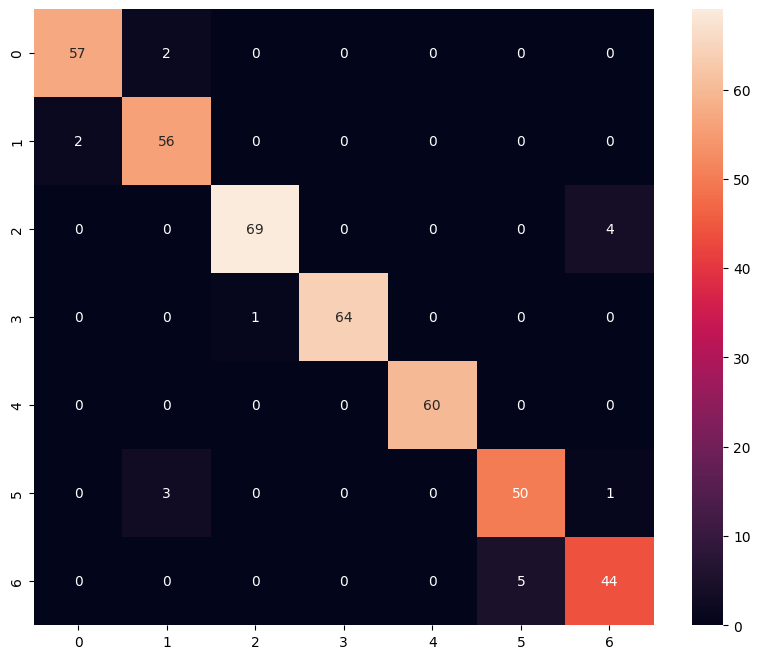

In [45]:
print(classification_report(y_ann, y_test, digits=4))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_ann, y_test), annot=True)
plt.show()

# ANN Model (Tensorflow)

In [46]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [47]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [48]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [50]:
num_classes = len(np.unique(y_encoded))

In [67]:
# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 7)                

In [69]:
checkpoint_path = 'training_model/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(checkpoint_path,
                             save_weights_only=True,
                             verbose=1)

lr_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=3,
                                            factor=0.5,
                                            min_lr = 1e-6,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 10,restore_best_weights=True,verbose=1)

In [70]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                     validation_data = (X_test, y_test),
                     callbacks = [cp_callback, lr_reduction, early_stoping],
                     batch_size = 64,
                     epochs = 50)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

y_pred = np.argmax(model.predict(X_test), axis=1)

y_pred_labels = label_encoder.inverse_transform(y_pred)

for i in range(10):
    print(f'Predicted: {y_pred_labels[i]}, True: {label_encoder.inverse_transform([y_test[i]])[0]}')

Epoch 1/50
25/27 [==========================>...] - ETA: 0s - loss: 1.8886 - accuracy: 0.2438
Epoch 1: saving model to training_model/cp.ckpt
27/27 [==============================] - 2s 20ms/step - loss: 1.8769 - accuracy: 0.2534 - val_loss: 1.5869 - val_accuracy: 0.5191 - lr: 0.0010
Epoch 2/50
23/27 [========================>.....] - ETA: 0s - loss: 1.5261 - accuracy: 0.4565
Epoch 2: saving model to training_model/cp.ckpt
27/27 [==============================] - 0s 9ms/step - loss: 1.5016 - accuracy: 0.4590 - val_loss: 1.1853 - val_accuracy: 0.6196 - lr: 0.0010
Epoch 3/50
24/27 [=========================>....] - ETA: 0s - loss: 1.2201 - accuracy: 0.5566
Epoch 3: saving model to training_model/cp.ckpt
27/27 [==============================] - 0s 9ms/step - loss: 1.2009 - accuracy: 0.5674 - val_loss: 0.9210 - val_accuracy: 0.6722 - lr: 0.0010
Epoch 4/50
24/27 [=========================>....] - ETA: 0s - loss: 1.0289 - accuracy: 0.6126
Epoch 4: saving model to training_model/cp.ckpt
27/27

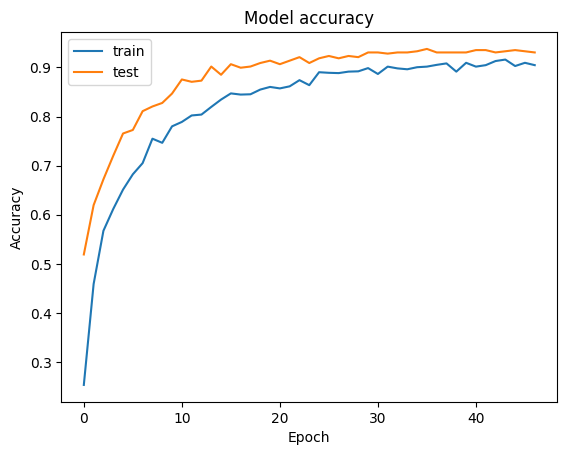

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)


14/14 [==============================] - 0s 2ms/step


                     precision    recall  f1-score   support

Insufficient_Weight     0.9016    0.9322    0.9167        59
      Normal_Weight     0.8710    0.8852    0.8780        61
     Obesity_Type_I     0.9306    0.9571    0.9437        70
    Obesity_Type_II     0.9692    0.9844    0.9767        64
   Obesity_Type_III     1.0000    1.0000    1.0000        60
 Overweight_Level_I     0.9583    0.8364    0.8932        55
Overweight_Level_II     0.8800    0.8980    0.8889        49

           accuracy                         0.9306       418
          macro avg     0.9301    0.9276    0.9282       418
       weighted avg     0.9314    0.9306    0.9304       418



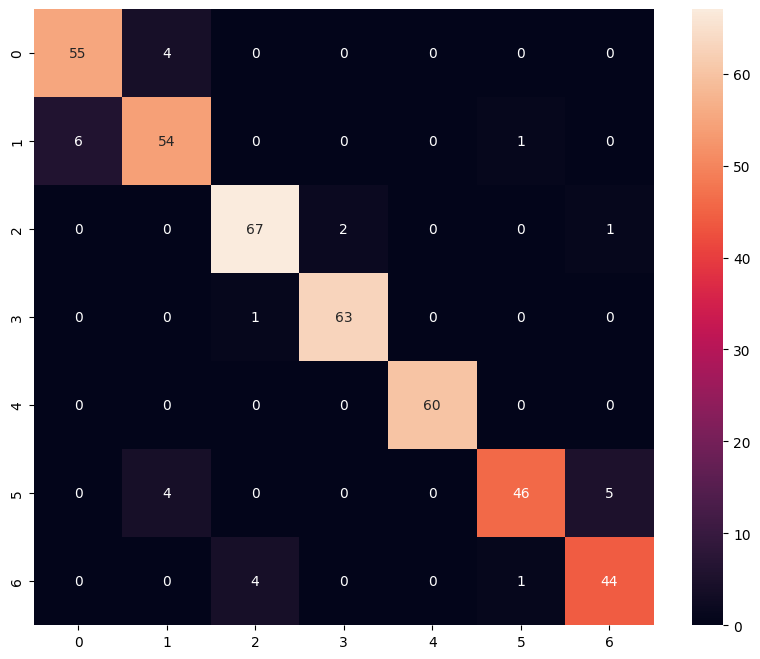

In [73]:
print(classification_report(y_test_labels, y_pred_labels, digits=4))

plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_test_labels, y_pred_labels), annot=True)
plt.show()